# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random as random

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#display(mouse_metadata)
#display(study_results)
# Combine the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata, how = "left", on = ["Mouse ID", "Mouse ID"])


# Display the data table for preview
merged_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_count = merged_data['Mouse ID'].nunique()
mouse_count

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merged_data[merged_data.duplicated(subset = ['Mouse ID', 'Timepoint'], keep = False)]
duplicate_mice = duplicates['Mouse ID'].unique()
duplicate_mice


array(['g989'], dtype=object)

In [5]:
duplicate_mouse_data = merged_data[merged_data['Mouse ID'].isin(duplicate_mice)]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
remove_duplicate_mouse = merged_data[merged_data['Mouse ID'].isin(duplicate_mice) == False]
cleaned_data = pd.DataFrame(remove_duplicate_mouse)
cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
mouse_count = cleaned_data['Mouse ID'].nunique()
mouse_count

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. \
#group by drug regimen
grouped_data = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)']
# Calculate the mean for each regimen
mean = grouped_data.mean()
# Calculate the median for each regimen
median = grouped_data.median()
# Calculate the variance for each regimen
variance = grouped_data.var()
# Calculate the standard deviation for each regimen
std_dev = grouped_data.std()
# Calculate the SEM for each regimen
sem = grouped_data.sem()
# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Variance': variance, 'Standard Deviation': std_dev, 'SEM': sem})
summary_df.columns = ['Mean Tumor Volume','Median Tumor Volume', 'Tumor Volume Variance','Tumor Volume Std. Dev.', 'Tumor Volume Std. Err.']
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
summary_stats = cleaned_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Using the aggregation method, produce the same summary statistics in a single line
summary_df = pd.DataFrame(summary_stats)
summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

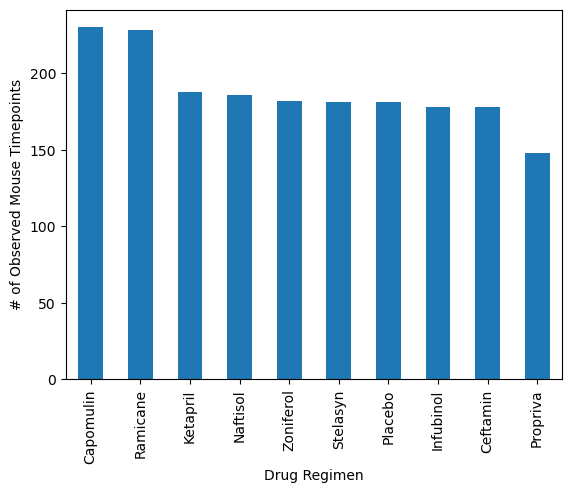

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = cleaned_data['Drug Regimen'].value_counts()
#create bar chart
regimen_counts.plot(kind='bar')


# Set the axis labels
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

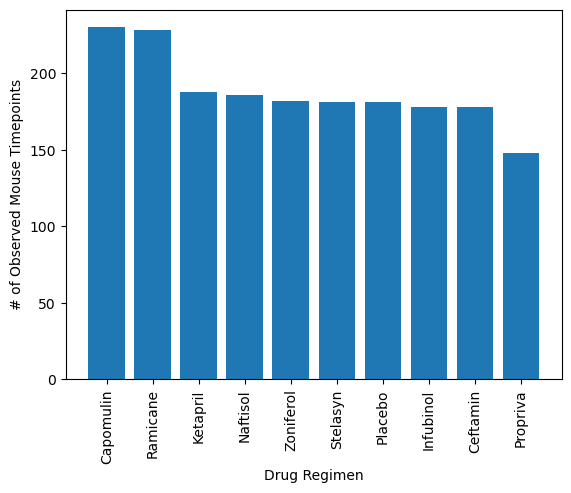

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Get the x and y values for the bar plot
x = regimen_counts.index
y = regimen_counts.values

# Create a bar plot
plt.bar(x, y)

# Set the axis labels and rotate
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)

#display chart
plt.show()

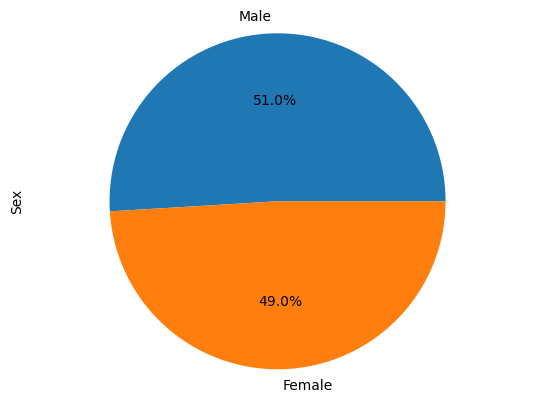

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#get the count for each gender
gender_counts = cleaned_data['Sex'].value_counts()
#create a pie plot
gender_counts.plot(kind='pie', autopct='%1.1f%%')

# Set the aspect ratio to make the pie circular
plt.axis('equal')
# Add a y-axis label
plt.ylabel('Sex')
# Show the plot
plt.show()

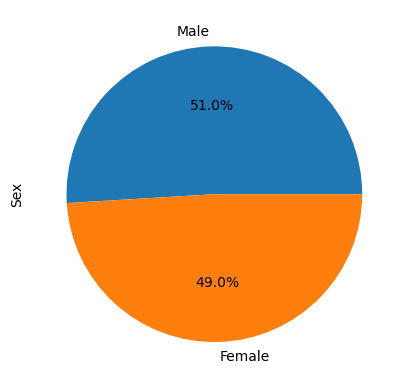

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Get the labels and sizes for the pie plot
labels = gender_counts.index
sizes = gender_counts.values

# Create a pie plot using pyplot
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

# Add a y-axis label
plt.ylabel('Sex')
# Show the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#filter data for the intended drug regimens
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_data = cleaned_data[cleaned_data['Drug Regimen'].isin(treatment_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = filtered_data.groupby('Mouse ID')['Timepoint'].max()



#Merge the last timepoints DataFrame with the original DataFrame
final_tumor_volume = pd.merge(last_timepoints, filtered_data, on=['Mouse ID', 'Timepoint'])

# # Display the resuling DF
final_tumor_volume


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_regimens:
    # Create a list of tumor volume data for each treatment regimen

    tumor_volume_data = []
    #Locate the rows which contain mice on each drug and get the tumor volumes
    #subset = final_sample_merge[final_sample_merge['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    mice_on_drug_reg = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]
    tumor_volume_data.extend(mice_on_drug_reg['Tumor Volume (mm3)'].tolist())
    
    # add subset 
    tumor_data_series = pd.Series(tumor_volume_data)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_data_series.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    # Display potential outliers
    outliers = tumor_data_series.loc[(tumor_data_series < lower_bound) | (tumor_data_series > upper_bound)]
    
    print(f"{treatment}'s potential outliers: {outliers}")
    print()

Capomulin's potential outliers: Series([], dtype: float64)

Ramicane's potential outliers: Series([], dtype: float64)

Infubinol's potential outliers: 5    36.321346
dtype: float64

Ceftamin's potential outliers: Series([], dtype: float64)



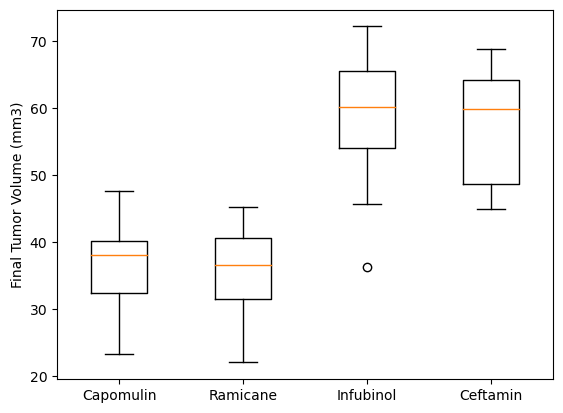

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create a list of tumor volume data for each treatment regimen
tumor_volume_data = []
for treatment in treatment_regimens:
    mice_on_drug_reg = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]
    tumor_volume_data.append(mice_on_drug_reg['Tumor Volume (mm3)'].values)

# Create a figure and axis for the box plot
fig, ax = plt.subplots()
# Generate the box plot
ax.boxplot(tumor_volume_data)
# Set the x-axis tick labels
ax.set_xticklabels(treatment_regimens)
# Set the y-axis label
ax.set_ylabel('Final Tumor Volume (mm3)')
# Show the plot
plt.show()

## Line and Scatter Plots

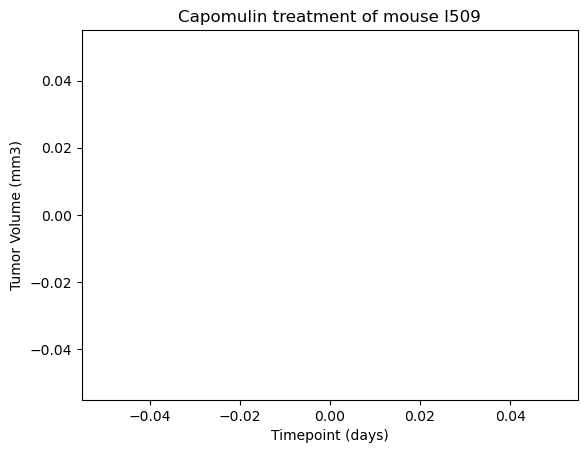

In [23]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Filter the data for Capomulin
capomulin_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']
# Select a single mouse
mouse_id = 'i509'
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]


# Create the line plot
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
# Set the x-axis label
plt.xlabel('Timepoint (days)')
# Set the y-axis label
plt.ylabel('Tumor Volume (mm3)')
# Set the title
plt.title('Capomulin treatment of mouse I509')
# Show the plot
plt.show()

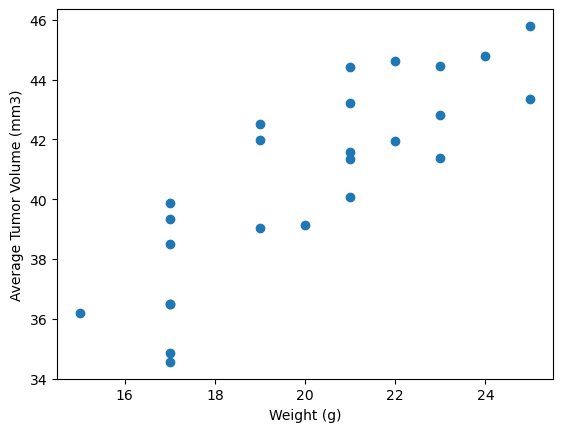

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Group the data by Mouse ID and calculate the average tumor volume
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
# Retrieve the corresponding mouse weight for each mouse ID
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()
# Create the scatter plot
plt.scatter(mouse_weights, average_tumor_volume)
# Set the x-axis label
plt.xlabel('Weight (g)')
# Set the y-axis label
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.841936342469472


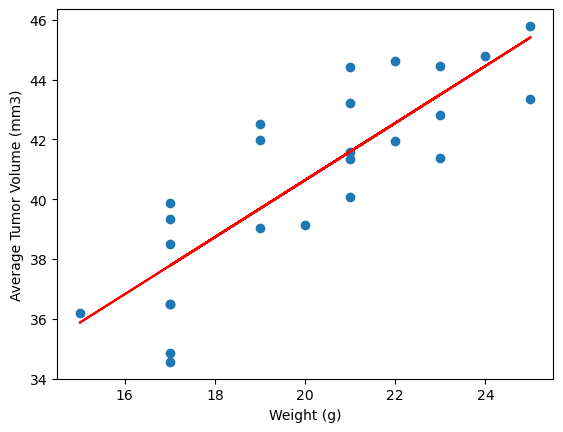

In [21]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Group the data by Mouse ID and calculate the average tumor volume
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
# Retrieve the corresponding mouse weight for each mouse ID
mouse_weights = capomulin_data.groupby('Mouse ID')['Weight (g)'].first()
# Create the scatter plot
plt.scatter(mouse_weights, average_tumor_volume)
# Set the x-axis label
plt.xlabel('Weight (g)')
# Set the y-axis label
plt.ylabel('Average Tumor Volume (mm3)')
# Calculate the correlation coefficient
correlation_coefficient, _ = st.pearsonr(mouse_weights, average_tumor_volume)
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient}")
# Perform linear regression
slope, intercept, _, _, _ = st.linregress(mouse_weights, average_tumor_volume)
# Add the linear regression line to the plot
plt.plot(mouse_weights, slope * mouse_weights + intercept, color='red')
plt.show()

The mouse ID 'i509' is not found in the dataset.
